Hacer una simulaciones de los proceso MA(1) y MA(2)
para diferentes tamaños de muestra T = 100, 300, 500 y computar la fun-
ción de autocorrelación muestral para cada caso. Compare la función de
autocorrelación muestral con la teórica.

Simulating MA(1) process


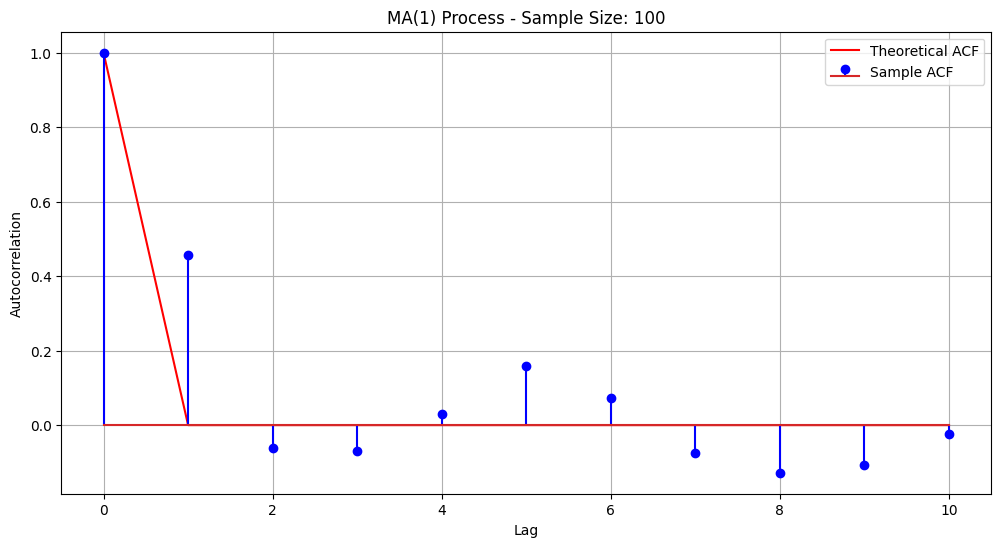

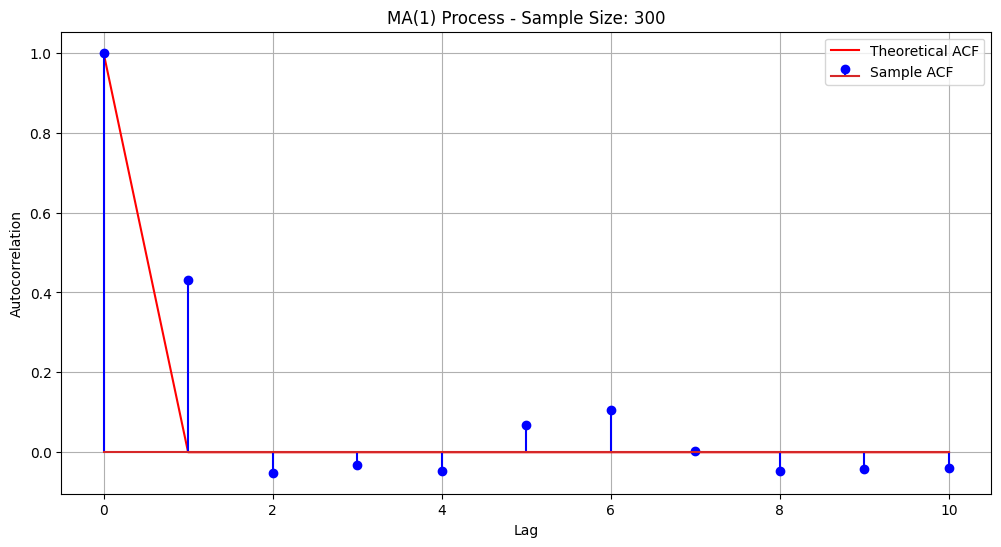

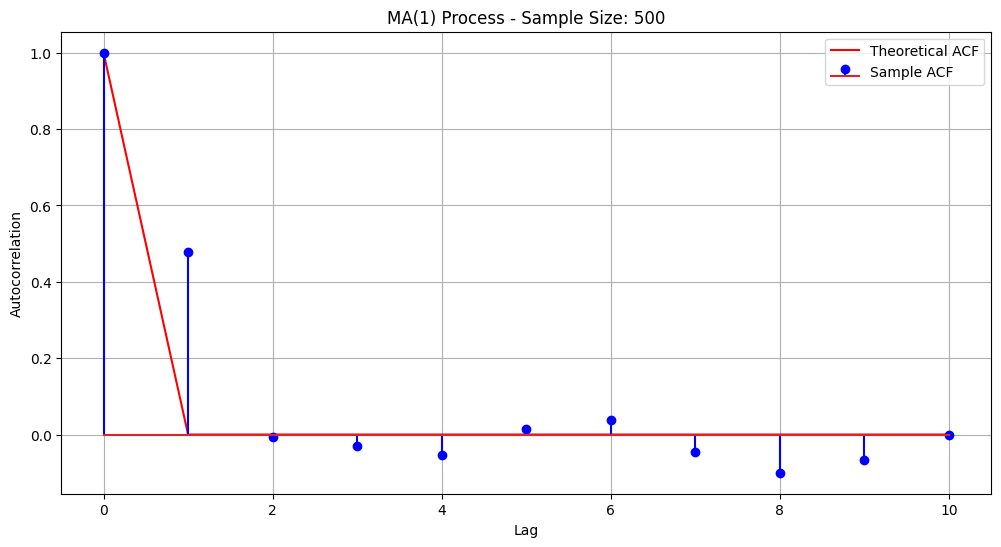


Simulating MA(2) process


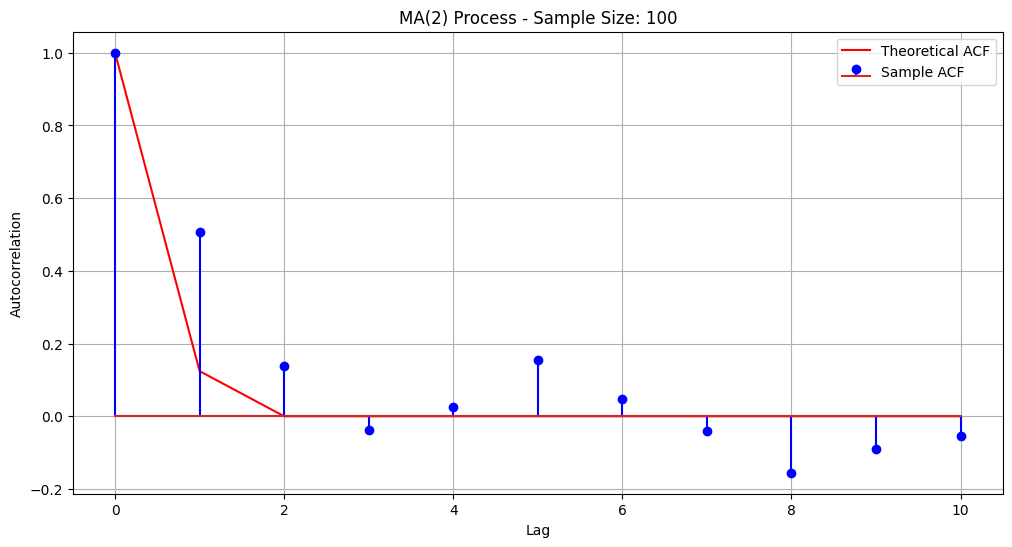

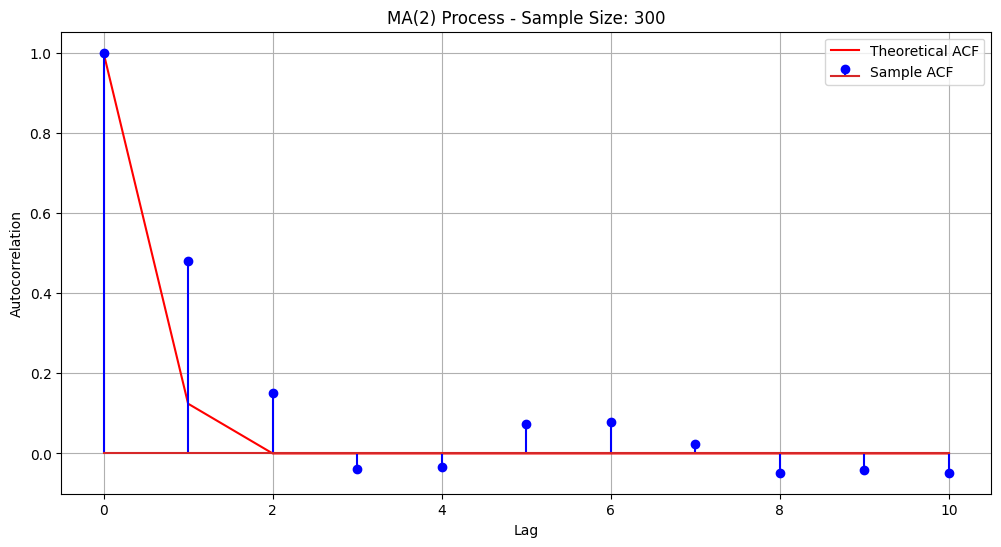

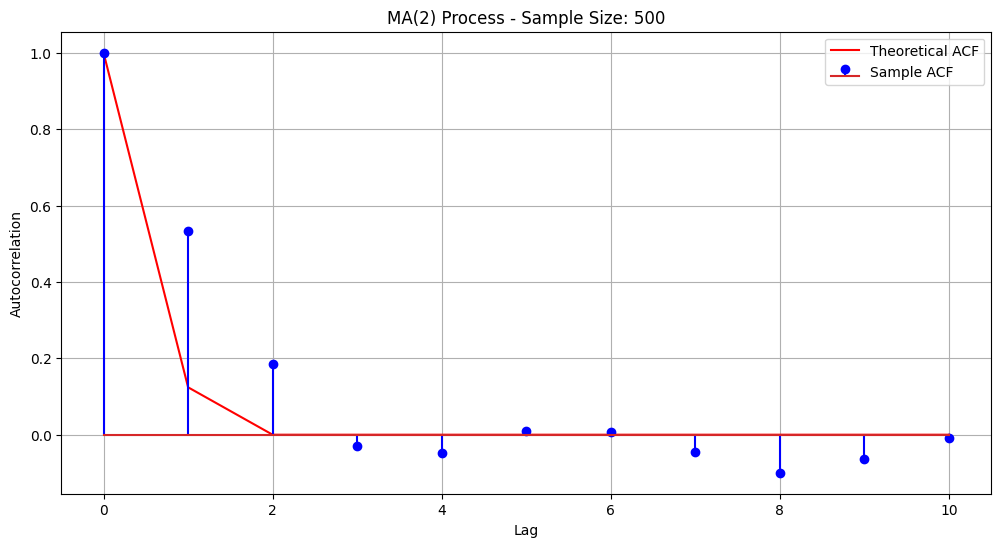

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def simulate_ma(ma_params, nsample):
    np.random.seed(42)
    ma_params = np.atleast_1d(ma_params)
    ar = np.array([1])
    ma = np.r_[1, ma_params]
    ma_process = ArmaProcess(ar, ma)
    return ma_process.generate_sample(nsample=nsample)

def theoretical_acf_ma(ma_params, lags):
    ma_params = np.atleast_1d(ma_params)
    q = len(ma_params)
    acf = np.zeros(lags + 1)
    acf[0] = 1
    variance = 1 + np.sum(np.square(ma_params))
    for i in range(1, min(q + 1, lags + 1)):
        acf[i] = np.sum(ma_params[i:] * ma_params[:-i]) / variance
    return acf

def plot_acf_comparison(data, theoretical_acf, title):
    lags = len(theoretical_acf) - 1
    empirical_acf = acf(data, nlags=lags)  # Using statsmodels acf function
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(lags + 1), theoretical_acf, 'r-', label='Theoretical ACF')
    plt.stem(range(lags + 1), empirical_acf, linefmt='b-', markerfmt='bo', label='Sample ACF')
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
sample_sizes = [100, 300, 500]
lags = 10

# MA(1) process
ma1_params = [0.8]
print("Simulating MA(1) process")
for size in sample_sizes:
    ma1_simulated = simulate_ma(ma1_params, size)
    theoretical_acf = theoretical_acf_ma(ma1_params, lags)
    plot_acf_comparison(ma1_simulated, theoretical_acf, f'MA(1) Process - Sample Size: {size}')

# MA(2) process
ma2_params = [0.6, 0.3]
print("\nSimulating MA(2) process")
for size in sample_sizes:
    ma2_simulated = simulate_ma(ma2_params, size)
    theoretical_acf = theoretical_acf_ma(ma2_params, lags)
    plot_acf_comparison(ma2_simulated, theoretical_acf, f'MA(2) Process - Sample Size: {size}')